#### Ibrahim Johar Farooqi
#### 23K-0074
#### ML - Lab 03 - Tasks

#### task 01

Occupancy dataset contains four attributes i-e "Humidity, Light, CO2 and Humidity ratio". 

Apply KNN to find if occupancy is possible or not (0 or 1) based on "Humidity, Light and Humidity Ratio" only. Train on "Occupancy_train.txt" and Test on "Occupancy_test.txt". You need to do the following then :
- Run this KNN Algorithm for n_neighbors (K) from 1 to 10. You will get 10 different accuracies. Print all the accuracies. Then print the highest accuracy and also the value of K at which you got the highest accuracy.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#loading the training n testing dataset
train_df = pd.read_csv("Occupancy_train.txt")
test_df = pd.read_csv("Occupancy_test.txt")

In [7]:
pd.set_option("display.width", 200)
print(f"training dataset:\n{train_df.head()}")
print(f"\ntesting dataset:\n{test_df.head()}")

training dataset:
                  date  Temperature  Humidity  Light     CO2  HumidityRatio  Occupancy
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793          1
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783          1
3  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779          1
4  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772          1
5  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757          1

testing dataset:
                    date  Temperature  Humidity       Light         CO2  HumidityRatio  Occupancy
140  2015-02-02 14:19:00      23.7000    26.272  585.200000  749.200000       0.004764          1
141  2015-02-02 14:19:59      23.7180    26.290  578.400000  760.400000       0.004773          1
142  2015-02-02 14:21:00      23.7300    26.230  572.666667  769.666667       0.004765          1
143  2015-02-02 14:22:00      23.7225    26.125  4

In [8]:
#features n target
features = ["Humidity", "Light", "HumidityRatio"]
target = "Occupancy"

X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]

In [10]:
accuracies = []
#running loop for diff 'k' vals
for k in range(1,11):
    #initialising and training knn
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    #predicting on test set
    y_pred = knn.predict(X_test)
    
    #calculating accuracy
    acc_score = accuracy_score(y_test, y_pred)
    accuracies.append(acc_score)
    print(f"testing accuracy of k({k})= {acc_score:.3}")

testing accuracy of k(1)= 0.94
testing accuracy of k(2)= 0.925
testing accuracy of k(3)= 0.957
testing accuracy of k(4)= 0.945
testing accuracy of k(5)= 0.955
testing accuracy of k(6)= 0.953
testing accuracy of k(7)= 0.963
testing accuracy of k(8)= 0.961
testing accuracy of k(9)= 0.965
testing accuracy of k(10)= 0.965


In [12]:
highest_acc = max(accuracies)
best_k = accuracies.index(highest_acc)
print(f"highest accuracy:{highest_acc:.3}")
print(f"best k:{best_k + 1}")

highest accuracy:0.965
best k:9


#### task 02

Now instead of using built-in library, write your own code for kNN classifier from
scratch. Run on iris dataset. Use 80/20 split. Print accuracy and confusion matrix at the end. You must use the following chi squared distance function

### the Chi-square distance between two vectors **x** and **y** is:

$$
d(x, y) = \sum_{i=1}^n \frac{(x_i - y_i)^2}{x_i + y_i}
$$

- \(x_i\) and \(y_i\) are the values of the \(i^{th}\) feature.
- denominator ensures that larger feature values don’t dominate the distance measure.


In [39]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

def chi_square_dist(x, y):
    return np.sum(((x - y) ** 2) / (x + y))   

#custom prediction function
def knn_prediction(X_train, y_train, testing_sample, k=3):
    distances = []
    #calc dist from testing_sample to each training sample
    for i in range(len(X_train)):
        d = chi_square_dist(testing_sample, X_train[i])
        distances.append((d, y_train[i])) #storing (dist,label)
        
    #sorting ascendingly the neigbors by dist
    distances.sort(key=lambda x:x[0])
    #selecting the top k NNs
    neighbors = distances[:k]
    targets = [label for _, label in neighbors]
    #majority voting
    most_common_target = Counter(targets).most_common(1)[0][0]
    
    return most_common_target

accuracies = []
for k in range(1,11):
    predictions = []
    corr = 0
    
    for i in range(len(X_test)):
        pred = knn_prediction(X_train, y_train, X_test[i], k)
        predictions.append(pred)
        if pred == y_test[i]:
            corr += 1
            
    accuracy = corr / len(y_test)
    accuracies.append(accuracy)
    print(f"k={k} - accuracy = {accuracy * 100:.3f}%")

#finding best k
highest_acc = max(accuracies)
best_k = accuracies.index(highest_acc)+1
print(f"best k:{best_k}")
print(f"highest accuracy: {highest_acc*100:.3f}%")

#get best_predictions
best_predictions = [knn_prediction(X_train, y_train, x, best_k) for x in X_test]

con_matrix = confusion_matrix(y_test, best_predictions)
print("\nconfusion matrix:")
print(con_matrix)
    

k=1 - accuracy = 91.111%
k=2 - accuracy = 91.111%
k=3 - accuracy = 95.556%
k=4 - accuracy = 93.333%
k=5 - accuracy = 95.556%
k=6 - accuracy = 93.333%
k=7 - accuracy = 93.333%
k=8 - accuracy = 93.333%
k=9 - accuracy = 97.778%
k=10 - accuracy = 93.333%
best k:9
highest accuracy: 97.778%

confusion matrix:
[[12  0  0]
 [ 0 14  1]
 [ 0  0 18]]


#### task 03

- Perform EDA
- Check the dataset is balance or not (using target variable “Label”)
- Check whether there is any empty records, categorical feature, duplicate records, if yes then handle this and give a brief explanation why you have chosen this technique in a text cell or “jupyter/colab”
- Check the correlation of your dataset and perform feature selection using Pearson Correlation
- Analyze your dataset and think if feature scaling is required or not? If yes then apply any scaling technique based on your distribution.
- Split your dataset in training , testing and validation. Train split will be 80% and test will be 20% . In validation split your training samples will be 70% and validation set will be 30%. Briefly describe why we use validation set in a text cell. Declare Random_state=0
- Apply KNN and check model training and testing accuracy.
- Compare the accuracies by trying different metrics, combine all the training and testing accuracies of Euclidean, Manhattan etc. to compare their performance. Make a critical analysis what you have observed and where we have used different metrics?
- Apply KNN and check model training and testing accuracy.

In [40]:
import pandas as pd

df = pd.read_csv("cancer patient data sets.csv")

print(f"shape of dataset: {df.shape}")

shape of dataset: (1000, 26)


In [41]:
df.columns

Index(['index', 'Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [42]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [46]:
#checking for missing vals, duplicate row, distribution of target var(level)
print("missing vals per col:\n", df.isnull().sum())
print("\nnum of duplicate rows:\n", df.duplicated().sum())
print("\ntarget distribution (Level):")
print(df["Level"].value_counts(normalize=True)*100)

missing vals per col:
 index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

num of duplicate rows:
 0

target distribution (Level):
Level
High      36.5
Medium    33.2
Low       30.3
Name: proportion, dtype: float64


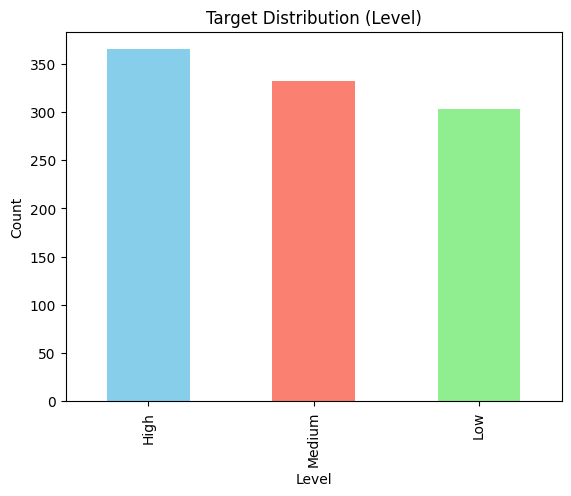

In [50]:
import matplotlib.pyplot as plt

df["Level"].value_counts().plot(
    kind="bar", color=["skyblue", "salmon", "lightgreen"]
)
plt.title("Target Distribution (Level)")
plt.xlabel("Level")
plt.ylabel("Count")
plt.show()

the Level values are balanced well

In [47]:
df = df.drop(columns=['index', 'Patient Id'])
print(df.dtypes)

Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object


In [48]:
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,Chest Pain,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,3,2,2,4,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,2,4,2,3,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,2,3,4,8,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,7,7,7,8,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,8,7,7,9,3,2,4,1,4,2,4,2,3,High


In [51]:
df_encoded = df.copy()
df_encoded["Level_encoded"] = df_encoded['Level'].map({"Low": 0, "Medium": 1, "High": 2})
corr_matrix = df_encoded.select_dtypes(include=['int64','float64']).corr()
level_corr = corr_matrix["Level_encoded"].drop("Level_encoded").sort_values(key=abs, ascending=False)

print("features ranked by correlation strength w/ Level:\n")
print(level_corr)

features ranked by correlation strength w/ Level:

Obesity                     0.827435
Coughing of Blood           0.782092
Alcohol use                 0.718710
Dust Allergy                0.713839
Balanced Diet               0.706273
Passive Smoker              0.703594
Genetic Risk                0.701303
OccuPational Hazards        0.673255
Chest Pain                  0.645461
Air Pollution               0.636038
Fatigue                     0.625114
chronic Lung Disease        0.609971
Smoking                     0.519530
Shortness of Breath         0.497024
Frequent Cold               0.444017
Dry Cough                   0.373968
Weight Loss                 0.352738
Snoring                     0.289366
Clubbing of Finger Nails    0.280063
Swallowing Difficulty       0.249142
Wheezing                    0.242794
Gender                     -0.164985
Age                         0.060048
Name: Level_encoded, dtype: float64


'obesity' is the most influential feature on Level

In [52]:
#select features whose absolute correlation with target is > 0.30
corr_matrix = df_encoded.select_dtypes(include=['int64', 'float64']).corr()
level_corr = corr_matrix["Level_encoded"].drop("Level_encoded")
corr_threshold = 0.30
selected_features = level_corr[abs(level_corr) > corr_threshold].index.tolist()

print("candidate features (|corr| > 0.30):")
print(selected_features)

candidate features (|corr| > 0.30):
['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Frequent Cold', 'Dry Cough']


In [53]:
#find highly correlated pairs among numeric columns and mark drop-candidates
#(we'll consider correlation > 0.85 as too redundant)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
multi_corr_threshold = 0.85
to_drop = [col for col in upper.columns if any(upper[col].abs() > multi_corr_threshold)]

print("highly inter-correlated columns (candidates to remove):")
print(to_drop)

highly inter-correlated columns (candidates to remove):
['OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease']


In [54]:
#creating final_features by removing highly correlated candidates from selected_features
final_features = [f for f in selected_features if f not in to_drop]
if len(final_features) == 0:
    #if nothing left, take top 6 by abs correlation
    final_features = level_corr.abs().sort_values(ascending=False).head(6).index.tolist()
    print("using top 6 features because all selected were flagged")
print("final features to use:", final_features)

final features to use: ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Frequent Cold', 'Dry Cough']


In [55]:
#prepare X and y
X = df_encoded[final_features].copy()
y = df_encoded["Level_encoded"].copy()

#split: 80% train, 20% test, then 30% of train -> validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=0, stratify=y_train)

print("shapes -> train-sub:", X_train_sub.shape, "val:", X_val.shape, "test:", X_test.shape)

shapes -> train-sub: (560, 14) val: (240, 14) test: (200, 14)


In [56]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sub_scaled = scaler.fit_transform(X_train_sub)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [60]:
#compare Euclidean (p=2) and Manhattan (p=1) with k=5
metrics = {"Euclidean": 2, "Manhattan": 1}
results = []

for name, p in metrics.items():
    knn = KNeighborsClassifier(n_neighbors=5, p=p)
    knn.fit(X_train_sub_scaled, y_train_sub)
    train_acc = accuracy_score(y_train_sub, knn.predict(X_train_sub_scaled))
    val_acc = accuracy_score(y_val, knn.predict(X_val_scaled))
    test_acc = accuracy_score(y_test, knn.predict(X_test_scaled))
    results.append([name, train_acc, val_acc, test_acc])
    
results_df = pd.DataFrame(results, columns=["metric", "train acc", "val acc", "test acc"])
print("results table:")
print(results_df)

results table:
      metric  train acc  val acc  test acc
0  Euclidean        1.0      1.0       1.0
1  Manhattan        1.0      1.0       1.0
